# 【問題1】1次関数
xが-50から50の範囲で次の式を考えます。<br>
y = (1/2)*x + 1   (-50 ≦ x ≦ 50)<br>
-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [1]:
import numpy as np

x = np.arange(-50, 50.1, 0.1)

y = np.array((1/2)*x + 1)

print(x) 
print(y)

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


# 【問題2】配列の結合
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。<br>
0列目にx、1列目にyが来るようにします。

In [2]:
x_rsp = x.reshape(-1, 1)
y_rsp = y.reshape(-1, 1)

# x_rsp と　y_rspをnp.concatenateで結合
z = np.concatenate([x_rsp, y_rsp], axis=1)
print(z)
print(z.shape)

# x_rsp と　y_rspをnp.hstackで結合
z_2 = np.hstack([x_rsp, y_rsp])
print(z_2)
print(z_2.shape)

# xと　yをnp.vstackで結合して転置
z_3 = np.vstack([x, y]).T 
print(z_3)
print(z_3.shape)

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]
(1001, 2)
[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]
(1001, 2)
[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]
(1001, 2)


# 【問題3】勾配を求める
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。<br>
各変化量は以下の図のように隣同士の要素の差から近似的に求めます。<br>
《注意》<rb>
厳密に各点における勾配を求めるには極限（微分）を利用する必要があります。<br>
勾配はx座標の間隔を使うので、xの要素数に対して一つ少なくなります。<br>

In [3]:
d_x = x[1:] - x[:-1]    # xの変化量
# print(d_x)

d_y = y[1:] - y[:-1]    # yの変化量
# print(d_y)

slope = d_y / d_x    # 勾配
print(type(slope))

<class 'numpy.ndarray'>


# 【問題4】グラフを描く
1次関数のグラフをMatplotlibを用いて描いてください。<br>
また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

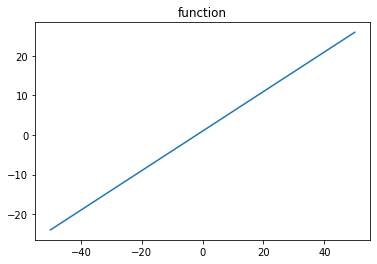

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# １次関数のグラフ
plt.title("function")
plt.plot(x, y)
plt.show()

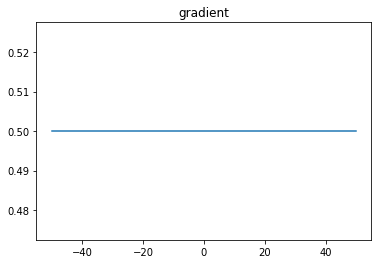

In [5]:
slope_1001 = np.append(slope, 0.5)    # slopeの要素数をxに合わせる（１０００→1001）

# 勾配のグラフ
plt.title("gradient")
plt.plot(x, slope_1001)
plt.show()

# 【問題5】Pythonの関数化
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。<br>
そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。<br>
y = x ** 2                      (-50 ≦ x ≦ 50)<br>
y = 2 * x ** 2 + 2 ** x       (-50 ≦ x ≦ 50)<br>
y = sin(x ** (1/2))           (0 ≦ x ≦ 50)<br>
また、問題4と同様にグラフを描いてください。<br>
ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。

(1001, 2)
(1000,)


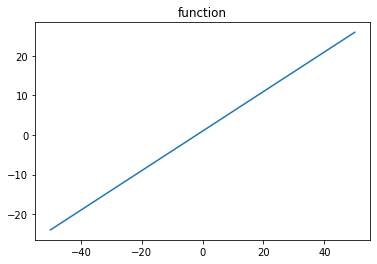

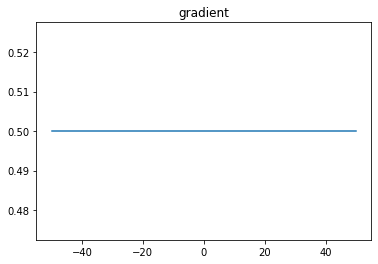

In [6]:
# 問題1から問題3までの範囲をまとめて行う関数

def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    
#   """
#   変化量を使い勾配を計算する。

#   Parameters
#   ----------------
#   function : function
#     求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
#   x_range : tuple
#     np.arange()の引数と同じ方法で範囲を指定する。

#   Returns
#   ----------------
#   array_xy : ndarray, shape(n, 2)
#     xとyを結合したもの。nはx_rangeに依存する。
#   gradient : ndarray, shape(n-1,)
#     関数の勾配。差をとるため要素は1つ減る
#   """

    array_x = np.arange(x_range[0], x_range[1], x_range[2])
    array_y = function(array_x)
    array_xy = np.vstack([array_x, array_y]).T    # xと　yをnp.vstackで結合して転置 
    
    
    d_x = array_x[1:] - array_x[:-1]    # xの変化量
    d_y = array_y[1:] - array_y[:-1]    # yの変化量
    gradient = d_y / d_x    # 勾配   
    
    return array_xy, gradient

def function1(array_x):
    array_y = np.array((1/2)*array_x + 1)
    return array_y

array_xy, gradient = compute_gradient(function1)
print(array_xy.shape)
print(gradient.shape)

# 関数のグラフ
plt.title("function")
plt.plot(array_xy.T[0], array_xy.T[1])
plt.show()

# 勾配のグラフ
plt.title("gradient")
plt.plot(array_xy.T[0][1:], gradient)
plt.show()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


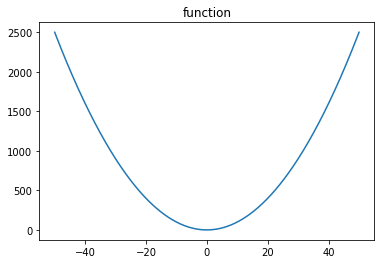

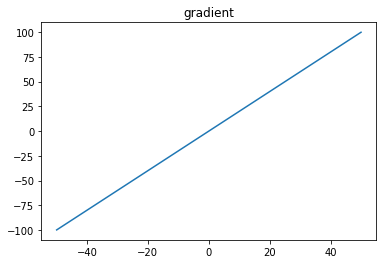

In [7]:
# y = x**2   (-50 ≦ x ≦ 50)

def function1(array_x):
    array_y = np.array(array_x**2)    # y = x**2 
    return array_y

array_xy, gradient = compute_gradient(function1)
print(type(array_xy))
print(type(gradient))

# 関数のグラフ
plt.title("function")
plt.plot(array_xy.T[0], array_xy.T[1])
plt.show()

# 勾配のグラフ
plt.title("gradient")
plt.plot(array_xy.T[0][1:], gradient)
plt.show()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


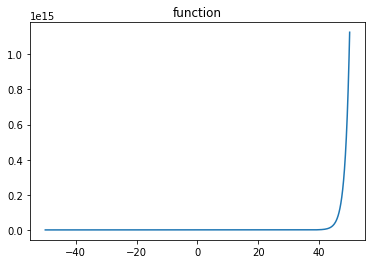

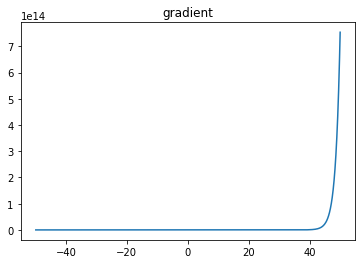

In [8]:
# y = 2 * x**2 + 2**x  (-50 ≦ x ≦ 50)

def function1(array_x):
    array_y = np.array(2 * array_x**2 + 2**array_x)    # y = 2 * x**2 + 2**x 
    return array_y

array_xy, gradient = compute_gradient(function1)
print(type(array_xy))
print(type(gradient))

# 関数のグラフ
plt.title("function")
plt.plot(array_xy.T[0], array_xy.T[1])
plt.show()

# 勾配のグラフ
plt.title("gradient")
plt.plot(array_xy.T[0][1:], gradient)
plt.show()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


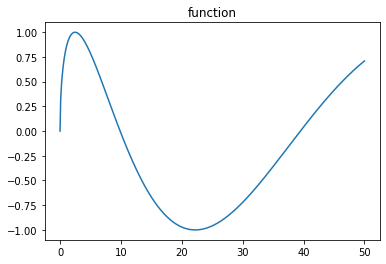

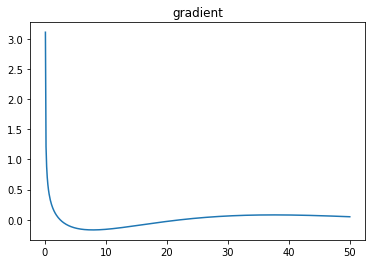

In [9]:
# y = sin(x**(1/2))    (0 ≦ x ≦ 50)

def function1(array_x):
    array_y = np.array(np.sin(array_x**(1/2)))    # y = sin(x**(1/2))
    return array_y

array_xy, gradient = compute_gradient(function1, x_range=(0, 50.1, 0.1))    # 0 ≦ x ≦ 50に変更
print(type(array_xy))
print(type(gradient))

# 関数のグラフ
plt.title("function")
plt.plot(array_xy.T[0], array_xy.T[1])
plt.show()

# 勾配のグラフ
plt.title("gradient")
plt.plot(array_xy.T[0][1:], gradient)
plt.show()

# 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。<br>
今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。<br>
minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。<br>
また、最小のyをとる前後の勾配を表示してください。

In [10]:
# y = (1/2)*x + 1   (-50 ≦ x ≦ 50)
x = np.arange(-50, 50.1, 0.1)
y = np.array((1/2)*x + 1)
y_min = y.min()
y_argmin = y.argmin()
print("関数：{}   の最小値は{}、そのインデックスは{}です。".format("y = (1/2)*x + 1   (-50 ≦ x ≦ 50)", y_min, y_argmin))

gradient_r = (y[y_argmin + 1] - y[y_argmin]) / (x[y_argmin + 1] - x[y_argmin])    # 勾配の計算（後ろ）
print("最小のyをとる前後の勾配は、前は{}、後ろは{}です。".format("「無し」", gradient_r))

関数：y = (1/2)*x + 1   (-50 ≦ x ≦ 50)   の最小値は-24.0、そのインデックスは0です。
最小のyをとる前後の勾配は、前は「無し」、後ろは0.5です。


In [11]:
# y = x**2   (-50 ≦ x ≦ 50)
x = np.arange(-50, 50.1, 0.1)
y = np.array(x**2)
y_min = y.min()
y_argmin = y.argmin()
print("関数：{}   の最小値は{}、そのインデックスは{}です。".format("y = x**2   (-50 ≦ x ≦ 50)", y_min, y_argmin))

gradient_f = (y[y_argmin - 1] - y[y_argmin]) / (x[y_argmin - 1] - x[y_argmin])    # 勾配の計算（前）             
gradient_r = (y[y_argmin + 1] - y[y_argmin]) / (x[y_argmin + 1] - x[y_argmin])    # 勾配の計算（後ろ）
print("最小のyをとる前後の勾配は、前は{}、後ろは{}です。".format(gradient_f, gradient_r))

関数：y = x**2   (-50 ≦ x ≦ 50)   の最小値は5.048709793414476e-25、そのインデックスは500です。
最小のyをとる前後の勾配は、前は-0.09999999999858034、後ろは0.1000000000014225です。


In [12]:
# y = 2 * x**2 + 2**x  (-50 ≦ x ≦ 50)
x = np.arange(-50, 50.1, 0.1)
y = np.array(2 * x**2 + 2**x)
y_min = y.min()
y_argmin = y.argmin()
print("関数：{}   の最小値は{}、そのインデックスは{}です。".format("y = 2 * x**2 + 2**x  (-50 ≦ x ≦ 50)", y_min, y_argmin))

gradient_f = (y[y_argmin - 1] - y[y_argmin]) / (x[y_argmin - 1] - x[y_argmin])    # 勾配の計算（前）             
gradient_r = (y[y_argmin + 1] - y[y_argmin]) / (x[y_argmin + 1] - x[y_argmin])    # 勾配の計算（後ろ）
print("最小のyをとる前後の勾配は、前は{}、後ろは{}です。".format(gradient_f, gradient_r))

関数：y = 2 * x**2 + 2**x  (-50 ≦ x ≦ 50)   の最小値は0.9505505632959851、そのインデックスは498です。
最小のyをとる前後の勾配は、前は-0.4170183305979998、後ろは0.024824282409972788です。


In [13]:
# y = sin(x**(1/2))    (0 ≦ x ≦ 50)
x = np.arange(0, 50.1, 0.1)
y = np.array(np.sin(x**(1/2)))
y_min = y.min()
y_argmin = y.argmin()
print("関数：{}   の最小値は{}、そのインデックスは{}です。".format("y = sin(x**(1/2))    (0 ≦ x ≦ 50)", y_min, y_argmin))

gradient_f = (y[y_argmin - 1] - y[y_argmin]) / (x[y_argmin - 1] - x[y_argmin])    # 勾配の計算（前）             
gradient_r = (y[y_argmin + 1] - y[y_argmin]) / (x[y_argmin + 1] - x[y_argmin])    # 勾配の計算（後ろ）
print("最小のyをとる前後の勾配は、前は{}、後ろは{}です。".format(gradient_f, gradient_r))

関数：y = sin(x**(1/2))    (0 ≦ x ≦ 50)   の最小値は-0.9999997540298113、そのインデックスは222です。
最小のyをとる前後の勾配は、前は-0.0006388422559544435、後ろは0.0004874477930660974です。
